In [5]:
using Pkg
Pkg.add(["Random", "Distributions", "Plots", "StatsPlots", "Statistics", "LinearAlgebra", "GLM", "DataFrames" ])

   Resolving package versions...
  No Changes to `C:\Users\bowus\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\bowus\.julia\environments\v1.10\Manifest.toml`
┌ Warning: Circular dependency detected. Precompilation will be skipped for:
│   CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
│   FilePathsBaseMmapExt [968c5e7e-8fc3-5f0f-93d2-8a5e0e125e4f]
│   FilePathsBaseTestExt [36f6b4e4-024d-52bd-a01f-148eb20c09de]
└ @ Pkg.API C:\Users\bowus\AppData\Local\Programs\Julia-1.10.5\share\julia\stdlib\v1.10\Pkg\src\API.jl:1279


In [6]:
using Random, Distributions, Plots, StatsPlots, Statistics, LinearAlgebra, GLM, DataFrames
T = 100
e = zeros(T)
y = zeros(T)
a = zeros(T)
x = zeros(T)
for t in 1:T
    e[t] = randn()
    a[t] = randn()
    if t == 1
        y[t] = e[t] 
        x[t] = a[t] 
    else 
        y[t] = y[t-1] + e[t]    
        x[t] = x[t-1] + a[t]
end
end
data = DataFrame(y=y, x=x)
# Run OLS regression: y ~ x
ols_model = lm(@formula(y ~ x), data)

# Print the results
adjusted_r_squared = adjr2(ols_model)
println("Adjusted R²: ", adjusted_r_squared)
print(ols_model)

ERROR: LoadError: ArgumentError: Package AdaptStaticArraysCoreExt does not have Adapt in its dependencies:
- You may have a partially installed environment. Try `Pkg.instantiate()`
  to ensure all packages in the environment are installed.
- Or, if you have AdaptStaticArraysCoreExt checked out for development and have
  added Adapt as a dependency but haven't updated your primary
  environment's manifest file, try `Pkg.resolve()`.
- Otherwise you may need to report an issue with AdaptStaticArraysCoreExt
Stacktrace:
 [1] macro expansion
   @ .\loading.jl:1776 [inlined]
 [2] macro expansion
   @ .\lock.jl:267 [inlined]
 [3] __require(into::Module, mod::Symbol)
   @ Base .\loading.jl:1753
 [4] #invoke_in_world#3
   @ .\essentials.jl:926 [inlined]
 [5] invoke_in_world
   @ .\essentials.jl:923 [inlined]
 [6] require(into::Module, mod::Symbol)
   @ Base .\loading.jl:1746
 [7] include
   @ .\Base.jl:495 [inlined]
 [8] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vect

Adjusted R²: 0.19240952177269233
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)   3.03002     0.724954   4.18    <1e-04   1.59137    4.46867
x            -0.636404    0.128346  -4.96    <1e-05  -0.891102  -0.381706
─────────────────────────────────────────────────────────────────────────

In [7]:

using Random, Distributions, GLM, DataFrames

function run_ols(T,ρ1, ρ2)
    # Initialize variables
    e = randn(T)  # Standard normal errors
    a = randn(T)  # Another set of standard normal errors
    y = zeros(T)
    x = zeros(T)
    
    # Generate y and x series as specified
    for t in 1:T
        e[t] = randn()
        a[t] = randn()
        if t == 1
            y[t] = e[t] 
            x[t] = a[t] 
        else 
            y[t] =  ρ1 * y[t-1] + e[t]    
            x[t] = ρ2 * x[t-1] + a[t]
    end
    end
    
    # Create DataFrame
    data = DataFrame(y=y, x=x)
    
    # Run OLS regression: y ~ x
    ols_model = lm(@formula(y ~ x), data)
    
    # Extract the R²
    r_squared = adjr2(ols_model)
    
    # Extract t-statistics for the coefficient of x
    t_stat = coef(ols_model)[2] / stderror(ols_model)[2]
    
    # Extract coefficient of x
    coef_x = coef(ols_model)[2]
    
    return ( coef_x, r_squared, t_stat)
    return ols_model
end
run_ols(100,1,1)


(0.9324270499760052, 0.18400178377633325, 4.8294714644181616)

Fraction of t-statistics exceeding 1.96: 0.339


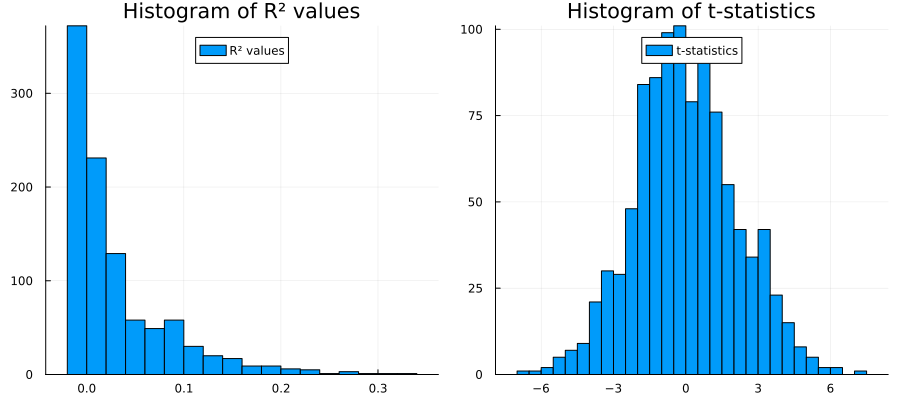

In [15]:
N = 1000
r_squared_values = []
t_stat_values = []
coef_values = []

for n in 1:N
    coef_x, r_squared, t_stat = run_ols(100,0.8,0.8)
    coef_values = push!(coef_values, coef_x)
    r_squared_values = push!(r_squared_values, r_squared)
    t_stat_values = push!(t_stat_values, t_stat)

end
# Compute the fraction of t-statistics exceeding 1.96 in absolute value
fraction_exceeding = sum(abs.(t_stat_values) .> 1.96) / N
println("Fraction of t-statistics exceeding 1.96: ", fraction_exceeding)

# Plot histograms for R² and t-statistics on the same figure
plot(histogram(r_squared_values, bins=30, label="R² values", title="Histogram of R² values", legend=:top),
     histogram(t_stat_values, bins=30, label="t-statistics", title="Histogram of t-statistics", legend=:top),
     layout=(1, 2), size=(900, 400))

#savefig("hist of R^2 and T_stat.png")


In [9]:
function compute_fraction_exceeding(T, N)
    r_squared_values = []
    t_stat_values = []
    coef_values = []

    for n in 1:N
        coef_x, r_squared, t_stat = run_ols(T,1,1)
        push!(coef_values, coef_x)
        push!(r_squared_values, r_squared)
        push!(t_stat_values, t_stat)
       
    end
    
    # Compute the fraction of t-statistics exceeding 1.96 in absolute value
    fraction_exceeding = sum(abs.(t_stat_values) .> 1.96) / N
    return fraction_exceeding
end


compute_fraction_exceeding (generic function with 1 method)

 Repeat (b) for different numbers of observations, T = 50 and T = 200. As
 the sample size increase is that fraction changing? Which number does
 it seem to approach? Which number should it approach?

In [10]:
T = [20, 50 , 100, 200, 500, 1000]  
N = 1000
fraction_exceeding_values = []
for i in 1:length(T)
    fraction_exceeding = compute_fraction_exceeding(T[i], N)
    push!(fraction_exceeding_values, fraction_exceeding)
end
results = DataFrame(T=T, fraction_exceeding=fraction_exceeding_values)
println(results)

6×2 DataFrame
 Row │ T      fraction_exceeding 
     │ Int64  Any                
─────┼───────────────────────────
   1 │    20  0.51
   2 │    50  0.672
   3 │   100  0.757
   4 │   200  0.847
   5 │   500  0.861
   6 │  1000  0.915


Do the same simulations you have in the previous problem but this time play
 around with the DGP and try different values for ρ1 and ρ2. First try both
 equal to 0.99 , then 0.95 then 0.9 and then 0.8 . Comments on your results.

In [12]:
ρ1 = [0.99, 0.95, 0.9, 0.8]
ρ2 = [0.99, 0.95, 0.9, 0.8]
coef_x_rhos = []
r_squared_rhos = []
t_stat_rhos = []
ρ1_values = []
ρ2_values = []

for i in 1:length(ρ1)
    for j in 1:length(ρ2)
        coef_x, r_squared, t_stat = run_ols(100, ρ1[i], ρ2[j])
        push!(coef_x_rhos, coef_x)
        push!(r_squared_rhos, r_squared)
        push!(t_stat_rhos, t_stat)
        push!(ρ1_values, ρ1[i])  # Track corresponding ρ1
        push!(ρ2_values, ρ2[j])  # Track corresponding ρ2
    end
end

# Store the results in a DataFrame
results = DataFrame(ρ1=ρ1_values, ρ2=ρ2_values, coef_x=coef_x_rhos, r_squared=r_squared_rhos, t_stat=t_stat_rhos)
println(results)



16×5 DataFrame
 Row │ ρ1    ρ2    coef_x      r_squared    t_stat    
     │ Any   Any   Any         Any          Any       
─────┼────────────────────────────────────────────────
   1 │ 0.99  0.99  -0.253163   0.205691     -5.16107
   2 │ 0.99  0.95  -0.0671947  -0.00411377  -0.770977
   3 │ 0.99  0.9   0.390716    0.0287065    1.9814
   4 │ 0.99  0.8   0.155889    0.000921049  1.04464
   5 │ 0.95  0.99  -0.513305   0.211232     -5.2452
   6 │ 0.95  0.95  0.570944    0.255309     5.9111
   7 │ 0.95  0.9   0.207693    0.0283006    1.97062
   8 │ 0.95  0.8   -0.532849   0.0902175    -3.28895
   9 │ 0.9   0.99  -0.121814   0.0229923    -1.82478
  10 │ 0.9   0.95  0.547003    0.332112     7.0872
  11 │ 0.9   0.9   -0.340545   0.0490416    -2.47093
  12 │ 0.9   0.8   -0.46789    0.211607     -5.2509
  13 │ 0.8   0.99  -0.266865   0.20017      -5.07704
  14 │ 0.8   0.95  0.21162     0.0391799    2.24432
  15 │ 0.8   0.9   0.129121    0.00435239   1.19698
  16 │ 0.8   0.8   -0.021754   -0.00

In [19]:
ρ1 = [0.99, 0.95, 0.9, 0.8]
ρ2 = [0.99, 0.95, 0.9, 0.8]
#ρ1_values = []
#ρ2_values = []
N = 1000
fraction_exceeding_values = []
for i in 1:length(ρ1)
    #for j in 1:length(ρ2)
        fraction_exceeding = compute_fraction_exceeding(100, N)
        push!(fraction_exceeding_values, fraction_exceeding)

        #push!(ρ1_values, ρ1[i])  # Track corresponding ρ1
        #push!(ρ2_values, ρ2[j])  # Track corresponding ρ2
    #end
end
results = DataFrame(ρ1=ρ1, fraction_exceeding=fraction_exceeding_values)
#results = DataFrame(ρ1=ρ1_values, ρ2=ρ2_values, fraction_exceeding=fraction_exceeding_values)
println(results)


4×2 DataFrame
 Row │ ρ1       fraction_exceeding 
     │ Float64  Any                
─────┼─────────────────────────────
   1 │    0.99  0.773
   2 │    0.95  0.763
   3 │    0.9   0.749
   4 │    0.8   0.761


Do the same simulations you have in the previous problem but this time play
 around with the DGP and now generate the two variables as having a deter
ministic trend. What happens now

In [1]:
using Random, Distributions, GLM, DataFrames

# Function to run OLS with varying ρ1, ρ2 and a deterministic trend
function run_ols_with_trend(T, ρ1, ρ2, β1, β2)
    e = randn(T)
    a = randn(T)
    y = zeros(T)
    x = zeros(T)
    
    for t in 2:T
        y[t] = ρ1 * y[t-1] + β1 * t + e[t]  # AR(1) process for y with trend
        x[t] = ρ2 * x[t-1] + β2 * t + a[t]  # AR(1) process for x with trend
    end
    
    data = DataFrame(y=y, x=x, t=1:T)  # Include time variable for trend
    ols_model = lm(@formula(y ~ x + t), data)  # Regress y on x and t (trend)
    
    r_squared = r2(ols_model)
    t_stat = coef(ols_model)[2] / stderror(ols_model)[2]  # t-stat for 'x'
    coef_x = coef(ols_model)[2]
    
    return (coef_x, r_squared, t_stat)
end

# Now loop through different ρ1 and ρ2 values with a trend
ρ1 = [0.99, 0.95, 0.9, 0.8]
ρ2 = ρ1
β1 = 0.05  # Trend coefficient for y
β2 = 0.05  # Trend coefficient for x
coef_x_rhos = []
r_squared_rhos = []
t_stat_rhos = []

for i in 1:length(ρ1)
    coef_x, r_squared, t_stat = run_ols_with_trend(100, ρ1[i], ρ2[i], β1, β2)
    push!(coef_x_rhos, coef_x)
    push!(r_squared_rhos, r_squared)
    push!(t_stat_rhos, t_stat)
end

# Store the results in a DataFrame
results = DataFrame(ρ1=ρ1, coef_x=coef_x_rhos, r_squared=r_squared_rhos, t_stat=t_stat_rhos)
println(results)


4×4 DataFrame
 Row │ ρ1       coef_x    r_squared  t_stat  
     │ Float64  Any       Any        Any     
─────┼───────────────────────────────────────
   1 │    0.99  0.699934  0.99875    52.5046
   2 │    0.95  0.562196  0.990006   6.80288
   3 │    0.9   0.912207  0.985795   6.09001
   4 │    0.8   0.127836  0.965651   1.39069
